**Processamento Digital de Imagens**

Prática de Amostragem e Quantização

Instruções: 
Utilize python e a biblioteca OpenCV para abertura das imagens. 


1)	Utilizando imagem relogio.tif e faça uma reamostragem de seus pixels para 300, 150 e 72 dpi. Sabe-se que a imagem original possui 1250 dpi. Fazer os cálculos por meio do seu algortimo. Não usar o opencv para a conversão

Tamanho da imagem :  (3692, 2812)


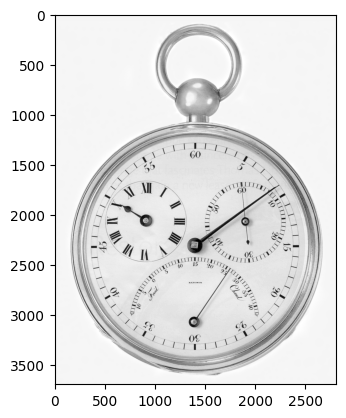

In [1]:
# type your code here
# Python code to read image
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("relogio.tif", cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap='gray', vmin=0, vmax=255);

print('Tamanho da imagem : ',img.shape)
# convertendo para 300dpi

linhas = img.shape[0]
colunas = img.shape[1];



Tamanho da imagem original:  (3692, 2812)
Tamanho da imagem redimensionada:  (213, 162)


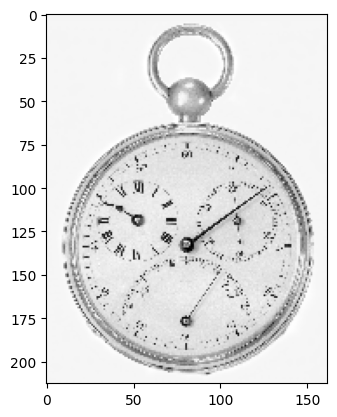

In [13]:
import math
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("relogio.tif", cv2.IMREAD_GRAYSCALE)
print('Tamanho da imagem original: ', img.shape)

linhas = img.shape[0];
colunas = img.shape[1];

# novo dpi desejado para imagem
novo_dpi = 72;

############################################################################################################################################
# código feito no lab

# regra de 3 para definição da nova quantidade de linhas e colunas
#novas_linhas = math.ceil(linhas * novo_dpi / 1250);
#novas_colunas = math.ceil(colunas * novo_dpi / 1250);

# criação de uma nova imagem com tamanho redimensionado
#nova_img = np.zeros((novas_linhas, novas_colunas))

# define nova proporção para linhas e colunas
#proporcao_linhas = linhas / novas_linhas
#proporcao_colunas = colunas / novas_colunas
#print('proporção novas linhas: ' + str(proporcao_linhas) + ' | proporção novas colunas: ' + str(proporcao_colunas));

#for i in range(novas_linhas):
#    for j in range(novas_colunas):
#        # percorre nova matriz de imagem adicionando alguns pixels da imagem original na imagem nova, de acordo com a proporção
#        x = int(j * proporcao_colunas)
#        y = int(i * proporcao_linhas)
#        nova_img[i, j] = img[y, x]

#print('Tamanho da imagem redimensionada: ', nova_img.shape)
#plt.imshow(nova_img, cmap='gray', vmin=0, vmax=255)
############################################################################################################################################

############################################################################################################################################
# código após apresentação lab

# define nova proporção para linhas e colunas
razao = 1250 / novo_dpi;

linhas_amostradas = np.arange(0,linhas, razao).astype(int);
colunas_amostradas = np.arange(0,colunas, razao).astype(int);
img_res2 = img[linhas_amostradas,:];
img_res2 = img_res2[:,colunas_amostradas];

print('Tamanho da imagem redimensionada: ', img_res2.shape)
plt.imshow(img_res2, cmap='gray', vmin=0, vmax=255)


Tamanho da imagem original:  (3692, 2812)
tamanho da imagem com 1250 DPIs:  (3692, 2812)
tamanho da imagem com 300 DPIs:  (887, 675)
tamanho da imagem com 150 DPIs:  (444, 338)
tamanho da imagem com 72 DPIs:  (213, 162)


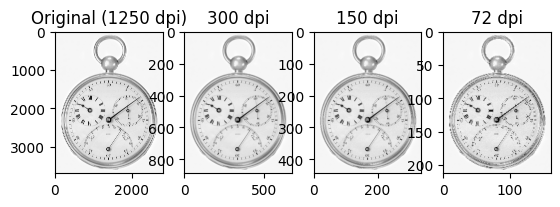

In [243]:
import math
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("relogio.tif", cv2.IMREAD_GRAYSCALE)

# plt.imshow(img, cmap='gray', vmin=0, vmax=255);

print('Tamanho da imagem original: ', img.shape)
# convertendo para 300dpi

linhas = img.shape[0];
colunas = img.shape[1];

array_dpi = [1250, 300, 150, 72];
nomes = ['Original (1250 dpi)', '300 dpi', '150 dpi', '72 dpi'];

for i in range(len(array_dpi)):
    # regra de 3 - DPI da imagem original com novo DPI desejado, para se obter o novo tamanho 
    linhas_novo_dpi = math.ceil(linhas * array_dpi[i] / 1250);
    colunas_novo_dpi = math.ceil(colunas * array_dpi[i] / 1250);

    nova_imagem = cv2.resize(img, (colunas_novo_dpi, linhas_novo_dpi));
    print ('tamanho da imagem com ' + str(array_dpi[i]) + ' DPIs: ', nova_imagem.shape);
    plt.subplot(1, 4, i + 1);
    plt.title(nomes[i]);
    plt.imshow(nova_imagem, cmap='gray', vmin=0, vmax=255);

2)	Utilizando a imagem ctskull-256.tif, refaça a quantização de seus pixels utilizando de 7 a 1 bit(s) por pixel.  Fazer os cálculos por meio do seu algortimo. Não usar o opencv para a conversão

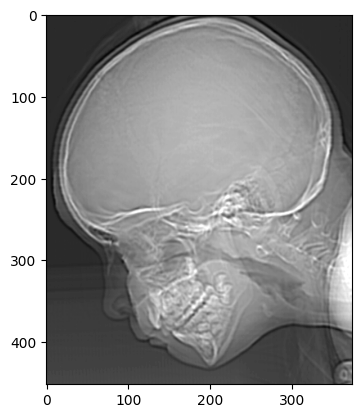

In [184]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("ctskull-256.tif", cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap='gray', vmin=0, vmax=255);

1 bits podem representar 2 intensidades
valores de intensidade: 0 a 1
fator: 255
divido cada pixel da imagem pelo fator 255 para obter os novos valores de pixel da imagem


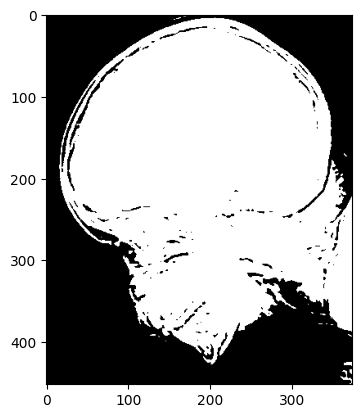

In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("ctskull-256.tif", cv2.IMREAD_GRAYSCALE)

imagem = np.matrix(img);

# número de bits desejado
bits = 1;

# intensidade possível com bits desejados
valor_maximo = (2 ** bits) - 1;
print(str(bits) + ' bits podem representar ' + str(valor_maximo + 1) + ' intensidades');
print('valores de intensidade: 0 a', valor_maximo);

# divido pixels da imagem pelo fator para obter os novos valores de pixel para imagem
fator = int(255.0 / valor_maximo);
print('fator:', fator);
print('divido cada pixel da imagem pelo fator ' + str(fator) + ' para obter os novos valores de pixel da imagem');

imagem_quantizada = np.round(imagem / fator);

# reescala imagem para 255 pixels para visualização
imagem_quantizada = np.round(imagem_quantizada / valor_maximo * 255);

plt.imshow(imagem_quantizada, cmap='gray', vmin=0, vmax=255);


8 bits podem representar 256 intensidades
valores de intensidade: 0 a 255
fator: 1
divido cada pixel da imagem pelo fator 1 para obter os novos valores de pixel da imagem
7 bits podem representar 128 intensidades
valores de intensidade: 0 a 127
fator: 2
divido cada pixel da imagem pelo fator 2 para obter os novos valores de pixel da imagem
6 bits podem representar 64 intensidades
valores de intensidade: 0 a 63
fator: 4
divido cada pixel da imagem pelo fator 4 para obter os novos valores de pixel da imagem
5 bits podem representar 32 intensidades
valores de intensidade: 0 a 31
fator: 8
divido cada pixel da imagem pelo fator 8 para obter os novos valores de pixel da imagem
4 bits podem representar 16 intensidades
valores de intensidade: 0 a 15
fator: 17
divido cada pixel da imagem pelo fator 17 para obter os novos valores de pixel da imagem
3 bits podem representar 8 intensidades
valores de intensidade: 0 a 7
fator: 36
divido cada pixel da imagem pelo fator 36 para obter os novos valores

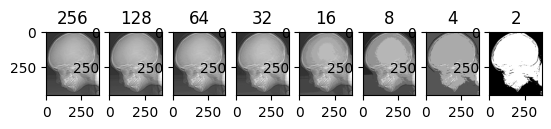

In [15]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("ctskull-256.tif", cv2.IMREAD_GRAYSCALE)

imagem = np.matrix(img);

# número de bits desejado
bits = [8, 7, 6, 5, 4, 3, 2, 1];

for i in range(len(bits)):
    # intensidade possível com bits desejados
    valor_maximo = (2 ** bits[i]) - 1;
    print(str(bits[i]) + ' bits podem representar ' + str(valor_maximo + 1) + ' intensidades');
    print('valores de intensidade: 0 a', valor_maximo);

    # divido pixels da imagem pelo fator para obter os novos valores de pixel para imagem
    fator = int(255.0 / valor_maximo);
    print('fator:', fator);
    print('divido cada pixel da imagem pelo fator ' + str(fator) + ' para obter os novos valores de pixel da imagem');

    imagem_quantizada = np.round(imagem / fator);
    # reescala imagem para 255 pixels para visualização
    imagem_quantizada = np.round(imagem_quantizada / valor_maximo * 255);
    
    plt.subplot(1, 8, i + 1);
    plt.title(valor_maximo + 1);
    plt.imshow(imagem_quantizada, cmap='gray', vmin=0, vmax=255);